In [13]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline



In [14]:
mean_01 = np.array([1.5, 4.0])
mean_02 = np.array([-1.0, -1.0])

cov_01 = np.array([[1.0, 0.0], [0.0, 1.0]])
cov_02 = np.array([[0.9, 0.3], [0.3, 0.9]])

dist_01 = np.random.multivariate_normal(mean_01, cov_01, 250)
dist_02 = np.random.multivariate_normal(mean_02, cov_02, 250)

data = np.zeros((dist_01.shape[0] + dist_02.shape[0], dist_01.shape[1]))
data[:dist_01.shape[0]] = dist_01
data[dist_01.shape[0]:] = dist_02

print data.shape, data.mean(axis=0)

(500, 2) [ 0.30965544  1.44812505]


In [15]:
labels = np.zeros((data.shape[0],))
labels[:dist_01.shape[0]] = 1

print labels.shape, labels.mean()


(500,) 0.5


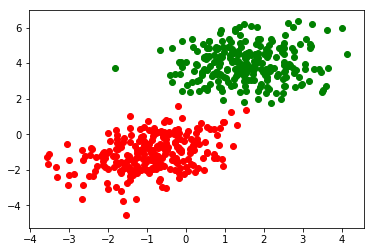

In [16]:
plt.figure(0)
for ix in range(data.shape[0]):
    if labels[ix] == 0:
        plt.scatter(data[ix, 0], data[ix, 1], color='red')
    else:
        plt.scatter(data[ix, 0], data[ix, 1], color='green')
plt.show()

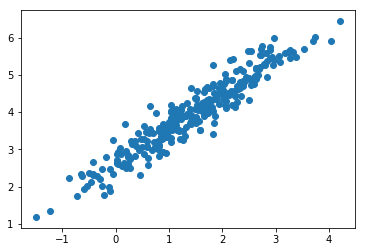

[ 0.98005995  2.69857809  0.80617198  1.86741525  1.03097689]
[ 3.47001003  5.52244543  3.50371522  3.89062905  3.20573425]


In [17]:
cov_val = [[1, 0.95], [0.95, 1]]

dt = np.random.multivariate_normal(mean_01, cov_val, 300)

plt.scatter(dt[:, 0], dt[:, 1])
plt.show()

X = dt[:, 0]
y = dt[:, 1]

print X[:5]
print y[:5]

In [18]:



def h_val(x_data, theta=None):
    # input x_data: numpy array
    #m = len(x_data)
    h = theta[0]*x_data + theta[1]
    #for ix in range(m):
    #    h += x_data[ix]*theta[ix]
    #h += 1.0*theta[-1]
    return h

def decide(x_data, theta):
    h = hval(x_data, theta)
    if h > 0.5:
        return 1
    else:
        return 0

def compute_loss_regression(X, theta, y):
    # Returns loss for X, y and theta values
    n = X.shape[0]
    loss = 0.0
    
    for nx in range(n):
        error = (y[nx] - h_val(X[nx], theta))**2
        loss += error
    loss = loss/n
    return loss

def compute_loss_grad(X, theta, y):
    n = X.shape[0]
    grad1 = 0.0
    grad2 = 0.0
    for nx in range(n):
        error1 = (h_val(X[nx], theta) - y[nx])*X[nx]
        grad1 += error1
        
        error2 = (h_val(X[nx], theta) - y[nx])
        grad2 += error2
    grad1 = grad1/n
    grad2 = grad2/n
    return [grad1, grad2]

def update_weights(X, theta, y, alpha=0.1):
    grad = compute_loss_grad(X, theta, y)
    theta[0] = theta[0] - alpha*grad[0]
    theta[1] = theta[1] - alpha*grad[1]
    return theta

def adaptive_learning_rate(alpha, total_epochs, current_epoch):
    return alpha*np.exp(-2 * float(current_epoch) / total_epochs)

print adaptive_learning_rate(0.1, 200, 200)

0.0135335283237


In [19]:
theta = [np.random.random(), np.random.random()]
nb_epoch = 200
alpha = 0.1

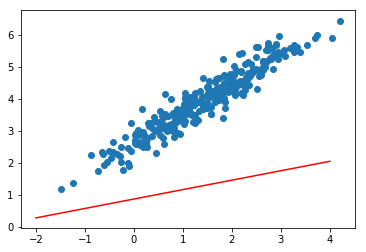

In [20]:
plt.figure(0)
plt.scatter(X, y)
pt1 = h_val(-2, theta)
pt2 = h_val(4, theta)
plt.plot([-2, 4], [pt1, pt2], 'r-')
plt.show()

In [21]:
all_loss = []
for ix in range(nb_epoch+1):
    alpha_val = alpha
    loss = compute_loss_regression(X, theta, y)
    all_loss.append(loss)
    if ix%10 == 0:
        print "Error at Epoch {0}:".format(ix), loss, '| alpha:', alpha_val
    theta = update_weights(X, theta, y, alpha_val)

Error at Epoch 0: 7.57365558595 | alpha: 0.1
Error at Epoch 10: 0.347008255864 | alpha: 0.1
Error at Epoch 20: 0.238829187238 | alpha: 0.1
Error at Epoch 30: 0.176706273807 | alpha: 0.1
Error at Epoch 40: 0.140777007703 | alpha: 0.1
Error at Epoch 50: 0.11999701163 | alpha: 0.1
Error at Epoch 60: 0.107978724485 | alpha: 0.1
Error at Epoch 70: 0.101027846084 | alpha: 0.1
Error at Epoch 80: 0.0970077465498 | alpha: 0.1
Error at Epoch 90: 0.0946826878549 | alpha: 0.1
Error at Epoch 100: 0.0933379704198 | alpha: 0.1
Error at Epoch 110: 0.0925602416749 | alpha: 0.1
Error at Epoch 120: 0.0921104356527 | alpha: 0.1
Error at Epoch 130: 0.091850286521 | alpha: 0.1
Error at Epoch 140: 0.0916998270621 | alpha: 0.1
Error at Epoch 150: 0.0916128075568 | alpha: 0.1
Error at Epoch 160: 0.091562479087 | alpha: 0.1
Error at Epoch 170: 0.0915333711893 | alpha: 0.1
Error at Epoch 180: 0.0915165363895 | alpha: 0.1
Error at Epoch 190: 0.0915067998402 | alpha: 0.1
Error at Epoch 200: 0.0915011686242 | alpha

0.0915011686242
[0.93388380035401219, 2.6344983025888769]


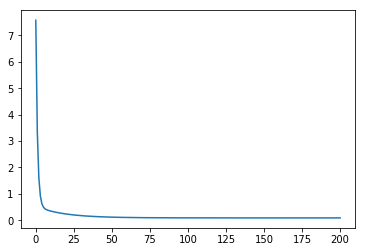

In [22]:
plt.plot(all_loss)
print all_loss[-1]
print theta
plt.show()

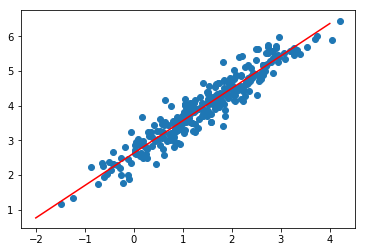

In [23]:
plt.figure(0)
plt.scatter(X, y)
pt1 = h_val(-2, theta)
pt2 = h_val(4, theta)
plt.plot([-2, 4], [pt1, pt2], 'r-')
plt.show()

In [24]:

class LogisticRegression:
    def __init__(self, X_train, y_train, alpha=0.01, nb_epochs=50):
        self.y_train = y_train
        self.alpha = alpha
        self.nb_epochs = nb_epochs
        self.dim = X_train.shape[1]
        self.X_train = np.ones((X_train.shape[0], self.dim + 1))
        self.X_train[:, 1:] = X_train
        self.theta = np.random.random((self.dim + 1, 1))
        self.loss_history = []
    
    def logit(self, x):
        return self.sigmoid(x.dot(self.theta))
    
    def sigmoid(self, z):
        return 1.0/(1.0 + np.exp(-1.0 * z))
    
    def compute_loss(self):
        n = self.X_train.shape[0]
        loss = 0.0
        for ix in range(n):
            hx = self.logit(self.X_train[ix])
            error = self.y_train[ix]*np.log(hx + 1e-03) + (1 - self.y_train[ix])*np.log(1 - hx + 1e-03)
            loss += -1.0 * error
        # loss = loss/n
        return loss
    
    def compute_grads(self):
        n = self.X_train.shape[0]
        grads = np.zeros(self.theta.shape)
        
        for ix in range(n):
            gr = -1.0 * (self.y_train[ix] - self.logit(self.X_train[ix]))*self.X_train[ix]
            # print gr.shape
            # print gr
            grads += gr.reshape(self.theta.shape)
        return grads/n
    
    def update_weights(self, alpha=None):
        if alpha == None:
            alpha = self.alpha
        
        grads = self.compute_grads()
        theta = self.theta - alpha*grads
        self.theta = theta
    
    def predict(self, x_test):
        x_vector = np.ones((1, x_test.shape[0] + 1))
        x_vector[:, 1:] = x_test
        hx = self.logit(x_vector)
        if hx < 0.5:
            return 0
        else:
            return 1
    
    def train(self, nb_epochs=None, record_loss=False):
        if nb_epochs == None:
            nb_epochs = self.nb_epochs
        
        for ex in range(nb_epochs):
            if record_loss:
                self.loss_history.append(self.compute_loss())
            self.update_weights()





In [25]:
all_data = np.zeros((data.shape[0], data.shape[1] + 1))
all_data[:, :data.shape[1]] = data
all_data[:, -1] = labels

np.random.shuffle(all_data)

In [26]:
split = int(0.8*all_data.shape[0])

data_train = all_data[:split, :-1]
data_test = all_data[split:, :-1]
labels_train = all_data[:split, -1]
labels_test = all_data[split:, -1]

lr = LogisticRegression(X_train=data_train, y_train=labels_train, alpha=0.5, nb_epochs=200)

In [27]:
print data_train
print labels_train

[[  2.91945539e-01   4.66233315e+00]
 [  1.02767626e+00   3.13929524e+00]
 [ -9.80115110e-01   7.19944437e-01]
 [ -3.01027053e+00  -2.85552360e+00]
 [  8.40349627e-01   3.82342954e+00]
 [  3.20418499e+00   4.94123347e+00]
 [  1.89605989e+00   2.63414090e+00]
 [  2.17030748e+00   3.58409826e+00]
 [  1.85431950e+00   4.27678069e+00]
 [  3.58409198e+00   2.71208901e+00]
 [ -2.45228872e+00  -1.14298293e+00]
 [  2.14420855e+00   5.03475406e+00]
 [  5.44088886e-01   4.83781862e+00]
 [  1.53225333e+00   4.26306867e+00]
 [ -1.01401468e-01   2.45153542e+00]
 [  2.08264314e+00   3.23743744e+00]
 [  1.53016763e+00   3.65329304e+00]
 [  3.64457571e+00   3.74937488e+00]
 [  2.51578417e+00   2.68998260e+00]
 [  1.85578936e+00   5.33663893e+00]
 [  1.50899858e+00   4.26530359e+00]
 [ -5.58319282e-01  -2.18395848e-01]
 [ -5.31056653e-01  -1.09295328e+00]
 [ -2.08085506e+00  -1.32831590e+00]
 [ -6.16386439e-01  -2.98077393e+00]
 [  2.02959415e+00   3.32556200e+00]
 [  1.67987425e+00   3.06496908e+00]
 

In [28]:

print lr.X_train.shape
print lr.nb_epochs
print lr.theta.shape
lr.train(record_loss=True)

(400, 3)
200
(3, 1)


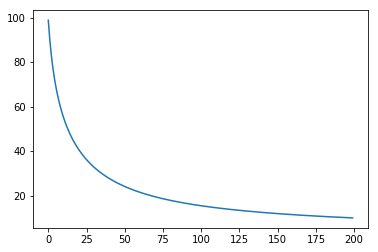

In [29]:
plt.plot(lr.loss_history)


In [30]:
lr.theta


array([[-2.77664869],
       [ 0.87860272],
       [ 1.92782648]])

In [40]:
preds = []
for ix in range(data_test.shape[0]):
    preds.append(lr.predict(data_test[ix]))

In [41]:
count = 0
for ix in range(labels_test.shape[0]):
    if preds[ix] == labels_test[ix]:
        count += 1
print "Accuracy:", float(count*100)/labels_test.shape[0]


Accuracy: 100.0
